In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import losses, optimizers

Using TensorFlow backend.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [3]:
train_data = np.array(pd.read_csv('./data/train_data.csv'))
X_train_val = train_data[:, :-1]
y_train_val = train_data[:, -1]

test_data = np.array(pd.read_csv('./data/test_data.csv'))
X_test = test_data[:, :-1]
y_test = test_data[:, -1]

number_of_games_in_16_17 = 1074

x_train = X_train_val[:-number_of_games_in_16_17, :]
x_validation = X_train_val[-number_of_games_in_16_17:, :]

y_train = y_train_val[:-number_of_games_in_16_17]
y_validation = y_train_val[-number_of_games_in_16_17:]

In [4]:
scaler_tv = preprocessing.StandardScaler()
scaler_tv.fit(x_train)
x_train = scaler_tv.transform(x_train)
x_validation = scaler_tv.transform(x_validation)

scaler_tt = preprocessing.StandardScaler()
scaler_tt.fit(X_train_val)
X_train_val = scaler_tt.transform(X_train_val)
X_test = scaler_tt.transform(X_test)

In [5]:
number_of_features = x_train.shape[1]
output_size = 1

In [6]:
model = Sequential()

In [7]:
model.add(Dense(units=20, input_dim=number_of_features, activation='relu'))

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
model.add(Dense(units=10, activation='relu'))

In [9]:
model.add(Dense(units=output_size, activation='sigmoid'))

In [10]:
model.compile(optimizer='adam', loss=losses.binary_crossentropy, metrics=['accuracy'])

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                1620      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 1,841
Trainable params: 1,841
Non-trainable params: 0
_________________________________________________________________


In [12]:
epochs = 30
batch_size = 16
verbose = 1

In [13]:
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose, validation_data=(x_validation, y_validation))

Instructions for updating:
Use tf.cast instead.
Train on 4291 samples, validate on 1074 samples
Epoch 1/30
4291/4291 [==============================] - 1s 235us/step - loss: 0.6544 - acc: 0.6236 - val_loss: 0.6494 - val_acc: 0.6173
Epoch 2/30
4291/4291 [==============================] - 1s 165us/step - loss: 0.6006 - acc: 0.6761 - val_loss: 0.6518 - val_acc: 0.6220
Epoch 3/30
4291/4291 [==============================] - 1s 127us/step - loss: 0.5861 - acc: 0.6905 - val_loss: 0.6548 - val_acc: 0.6276
Epoch 4/30
4291/4291 [==============================] - 1s 127us/step - loss: 0.5779 - acc: 0.6938 - val_loss: 0.6544 - val_acc: 0.6238
Epoch 5/30
4291/4291 [==============================] - 1s 133us/step - loss: 0.5705 - acc: 0.6998 - val_loss: 0.6615 - val_acc: 0.6164
Epoch 6/30
4291/4291 [==============================] - 1s 132us/step - loss: 0.5648 - acc: 0.7017 - val_loss: 0.6644 - val_acc: 0.6229
Epoch 7/30
4291/4291 [==============================] - 1s 135us/step - loss: 0.5589 - a

In [14]:
epochs = history.epoch

In [15]:
loss = history.history['loss']
validation_loss = history.history['val_loss']

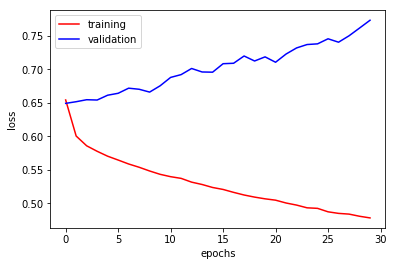

In [16]:
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(epochs, loss, c='red', label='training')
plt.plot(epochs, validation_loss, c='blue', label='validation')
plt.legend(loc='best')
plt.show()

In [17]:
acc = history.history['acc']
validation_acc = history.history['val_acc']

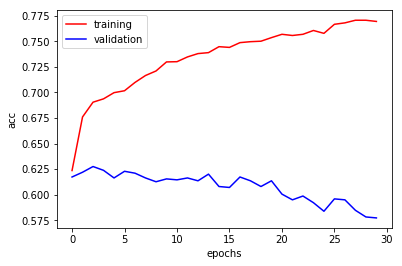

In [18]:
plt.xlabel('epochs')
plt.ylabel('acc')
plt.plot(epochs, acc, c='red', label='training')
plt.plot(epochs, validation_acc, c='blue', label='validation')
plt.legend(loc='best')
plt.show()

In [19]:
test_loss, test_acc = model.evaluate(X_test, y_test)

1075/1075 [==============================] - 0s 41us/step


In [20]:
test_loss

0.7150540219905764

In [21]:
test_acc

0.6297674417772958